In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle

In [52]:
InputPath = ""
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))

In [73]:
X = X/255.0
print(X.shape[1:])
print(y.shape[1:])

(50, 50, 3)
(1,)


In [74]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [75]:
import time
NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))

In [76]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [77]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [86]:
model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
# model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation("relu"))


model.add(tf.keras.layers.Dense(5))

model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_34 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                495680    
__________

In [97]:
# history = model.fit(X,y,batch_size=32, epochs = 10, validation_split=0.3, callbacks = [tensorboard])
history = model.fit(train_X, train_y, epochs=30, 
                    validation_data=(test_X, test_y))

Train on 700 samples, validate on 175 samples
Epoch 1/30
700/700 [==============================] - 3s 4ms/step - loss: 1.6092 - acc: 0.2100 - val_loss: 1.6136 - val_acc: 0.1600
Epoch 2/30
700/700 [==============================] - 3s 4ms/step - loss: 1.6088 - acc: 0.2100 - val_loss: 1.6127 - val_acc: 0.1600
Epoch 3/30
700/700 [==============================] - 3s 4ms/step - loss: 1.6074 - acc: 0.2100 - val_loss: 1.6097 - val_acc: 0.1600
Epoch 4/30
700/700 [==============================] - 3s 4ms/step - loss: 1.5975 - acc: 0.2129 - val_loss: 1.5735 - val_acc: 0.1886
Epoch 5/30
700/700 [==============================] - 3s 4ms/step - loss: 1.5318 - acc: 0.2871 - val_loss: 1.4810 - val_acc: 0.2800
Epoch 6/30
700/700 [==============================] - 3s 4ms/step - loss: 1.4590 - acc: 0.3714 - val_loss: 1.4387 - val_acc: 0.4171
Epoch 7/30
700/700 [==============================] - 3s 4ms/step - loss: 1.3621 - acc: 0.4714 - val_loss: 1.3314 - val_acc: 0.4514
Epoch 8/30
700/700 [==========

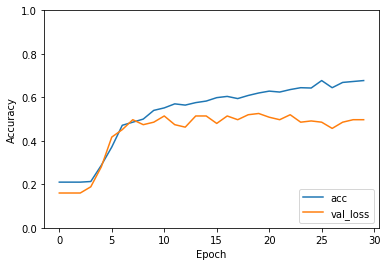

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

In [94]:
history.history

{'acc': [0.2100000002554485, 0.210000000170299, 0.2100000002554485],
 'loss': [1.609373517717634, 1.6091318035125732, 1.6090504326139177],
 'val_acc': [0.16000000059604644, 0.16000000059604644, 0.16000000059604644],
 'val_loss': [1.6108621644973755, 1.6115084736687797, 1.6120382002421787]}

[0.16000000059604644, 0.16000000059604644, 0.16000000059604644]